In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import pandas as pd
from scipy.stats import chi2_contingency


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# Define the file path to your TXT file
file_path = 'CS_data.txt'  # Replace with the actual path to your file

# ask notebook to show all of the column of the data set
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read the TXT file using pandas, specifying tab as the delimiter
data = pd.read_csv(file_path, sep='\t')

# Display the DataFrame (optional)
data.head() # Display the first few rows to verify the import

C:\Users\redhawc\AppData\Local\Temp\ipykernel_71120\3537502289.py:9: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NATIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD.1
1,1,C,-99999,0,0,1,F,6,1,NaN,RN,Assu,1,RN,Santana do Matos,Centro,Y,105.0,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
2,2,C,-99999,Web,0,1,F,2,0,NaN,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20.0,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,NaN,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
3,3,C,-99999,0,0,1,F,2,0,NaN,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105.0,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
4,4,C,-99999,Web,0,1,F,2,0,NaN,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,NaN,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
5,5,C,-99999,Web,0,1,M,2,0,NaN,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20.0,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


# Drop the yellow and red

In [4]:
#### drop professional state

In [5]:
predictor_use = ['ID_CLIENT','PAYMENT_DAY','QUANT_DEPENDANTS','CITY_OF_BIRTH','RESIDENCIAL_STATE',
                'RESIDENCIAL_BOROUGH','FLAG_RESIDENCIAL_PHONE','MONTHS_IN_RESIDENCE',
                'FLAG_MOBILE_PHONE','PERSONAL_MONTHLY_INCOME','OTHER_INCOMES','QUANT_BANKING_ACCOUNTS','QUANT_SPECIAL_BANKING_ACCOUNTS',
                'PERSONAL_ASSETS_VALUE','QUANT_CARS','COMPANY','FLAG_PROFESSIONAL_PHONE','MONTHS_IN_THE_JOB',
                'FLAG_ACSP_RECORD','AGE', 'APPLICATION_SUBMISSION_TYPE','POSTAL_ADDRESS_TYPE','NATIONALITY',
                 'FLAG_EMAIL','FLAG_VISA','FLAG_MASTERCARD','FLAG_DINERS','FLAG_AMERICAN_EXPRESS',
                 'MARITAL_STATUS','TARGET_LABEL_BAD.1']

In [6]:
data = data[predictor_use]
data.head()

,ID_CLIENT,PAYMENT_DAY,QUANT_DEPENDANTS,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,FLAG_ACSP_RECORD,AGE,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,NATIONALITY,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,MARITAL_STATUS,TARGET_LABEL_BAD.1
1,1,-99999,1,Assu,RN,Centro,Y,15.0,N,900.0,0.0,0,0,0.0,0,N,N,0,N,32,0,1,1,1,1,1,0,0,6,1
2,2,-99999,0,rio de janeiro,RJ,CAMPO GRANDE,Y,1.0,N,750.0,0.0,0,0,0.0,0,Y,N,0,N,34,Web,1,1,1,0,0,0,0,2,1
3,3,-99999,0,GARANHUNS,RN,Boa Esperanca,Y,NaN,N,500.0,0.0,0,0,0.0,0,N,N,0,N,27,0,1,1,1,0,0,0,0,2,0
4,4,-99999,0,CABO,PE,PONTE DOS CARVALHOS,N,NaN,N,500.0,0.0,0,0,0.0,0,N,N,0,N,61,Web,1,1,1,0,0,0,0,2,0
5,5,-99999,0,RIO DE JANEIRO,RJ,Santa Cruz,Y,12.0,N,1200.0,0.0,0,0,0.0,0,N,N,0,N,48,Web,1,1,1,0,0,0,0,2,1


In [7]:
data.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,AGE,POSTAL_ADDRESS_TYPE,NATIONALITY,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,MARITAL_STATUS,TARGET_LABEL_BAD.1
count,50000.000000,50000.000000,50000.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,25000.500000,-167.151640,0.650520,9.727149,886.678437,35.434760,0.357840,0.357840,2.322372e+03,0.336140,0.009320,43.24852,1.006540,0.961600,0.802280,0.111440,0.097460,0.001320,0.001740,2.14840,0.260820
std,14433.901067,4239.371262,1.193655,10.668841,7846.959327,891.515142,0.479953,0.479953,4.235798e+04,0.472392,0.383453,14.98905,0.080606,0.202105,0.398284,0.314679,0.296586,0.036308,0.041677,1.32285,0.439086
min,1.000000,-99999.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,6.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12500.750000,10.000000,0.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,31.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
50%,25000.500000,10.000000,0.000000,6.000000,500.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,41.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
75%,37500.250000,15.000000,1.000000,15.000000,800.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,53.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.00000,1.000000
max,50000.000000,25.000000,53.000000,228.000000,959000.000000,194344.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,106.00000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000,1.000000


# Train Test Split

In [8]:
train_indices, test_indices = train_test_split(np.array (data.index), test_size=0.3,
                                               stratify=data["TARGET_LABEL_BAD.1"], random_state=0)
# MAKE SURE THE RATIO OF DEPEDNDENT VARIABLE IS THE SAME FOR TRAIN AND TEST
data_train = data.loc [train_indices].copy ()
data_test = data.loc[test_indices].copy ( )
print (data_train.shape)
print (data_test.shape)

(35000, 30)
(15000, 30)


# Drop missing values 

In [9]:
missing_values = data_train.isnull()
missing_counts = missing_values.sum()
missing_counts

ID_CLIENT                            0
PAYMENT_DAY                          0
QUANT_DEPENDANTS                     0
CITY_OF_BIRTH                        0
RESIDENCIAL_STATE                    0
RESIDENCIAL_BOROUGH                  0
FLAG_RESIDENCIAL_PHONE               0
MONTHS_IN_RESIDENCE               2648
FLAG_MOBILE_PHONE                    0
PERSONAL_MONTHLY_INCOME              0
OTHER_INCOMES                        0
QUANT_BANKING_ACCOUNTS               0
QUANT_SPECIAL_BANKING_ACCOUNTS       0
PERSONAL_ASSETS_VALUE                0
QUANT_CARS                           0
COMPANY                              0
FLAG_PROFESSIONAL_PHONE              0
MONTHS_IN_THE_JOB                    0
FLAG_ACSP_RECORD                     0
AGE                                  0
APPLICATION_SUBMISSION_TYPE          0
POSTAL_ADDRESS_TYPE                  0
NATIONALITY                          0
FLAG_EMAIL                           0
FLAG_VISA                            0
FLAG_MASTERCARD          

## PAYMENT_DAY

#### when I try to drop the -99999 values, I find that they exits in the first 90 rows, maybe there are collection error or something

In [10]:
data_train['PAYMENT_DAY'].value_counts()

PAYMENT_DAY
 10       14332
 15        6115
 5         5111
 25        4920
 20        3271
 1         1180
-99999       71
Name: count, dtype: int64

In [11]:
# Drop rows where 'PAYMENT_DAY' is "-9999"
data_train = data_train[data_train['PAYMENT_DAY'] != -99999]

# Reset the index after dropping rows
data_train.reset_index(drop=True, inplace=True)

In [12]:
data_train['PAYMENT_DAY'].value_counts()

PAYMENT_DAY
10    14332
15     6115
5      5111
25     4920
20     3271
1      1180
Name: count, dtype: int64

In [13]:
data_test = data_test[data_test['PAYMENT_DAY'] != -99999]
data_test.reset_index(drop=True, inplace=True)

## MONTHS_IN_RESIDENCE

In [14]:
data["MONTHS_IN_RESIDENCE"].value_counts()

MONTHS_IN_RESIDENCE
1.0      7340
0.0      4695
10.0     3799
5.0      3561
2.0      3217
20.0     2417
3.0      2284
15.0     1899
6.0      1605
4.0      1597
8.0      1539
30.0     1166
12.0     1121
7.0       939
9.0       811
25.0      801
18.0      589
14.0      560
11.0      514
16.0      495
40.0      481
13.0      461
17.0      378
22.0      377
23.0      334
19.0      307
35.0      289
24.0      254
21.0      247
26.0      245
28.0      233
27.0      187
32.0      159
50.0      147
29.0      110
36.0      106
38.0       91
37.0       88
33.0       86
45.0       85
31.0       79
34.0       78
42.0       49
39.0       48
46.0       35
48.0       32
41.0       31
43.0       26
60.0       25
47.0       23
49.0       22
55.0       19
44.0       17
52.0       15
53.0       12
51.0       11
58.0        8
56.0        8
54.0        8
65.0        7
68.0        6
72.0        4
57.0        4
64.0        4
59.0        3
70.0        3
61.0        3
80.0        3
63.0        3
69.0        2


In [15]:
data_train.dropna(subset=['MONTHS_IN_RESIDENCE'], inplace=True)

In [16]:
data_test.dropna(subset=['MONTHS_IN_RESIDENCE'], inplace=True)

# APPLICATION_SUBMISSION_TYPE

In [17]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts()

APPLICATION_SUBMISSION_TYPE
Web      16302
0        12724
Carga     3264
Name: count, dtype: int64

In [18]:
data_train['APPLICATION_SUBMISSION_TYPE'] = data_train['APPLICATION_SUBMISSION_TYPE'].replace('0', "Unknown")

In [19]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts()

APPLICATION_SUBMISSION_TYPE
Web        16302
Unknown    12724
Carga       3264
Name: count, dtype: int64

In [20]:
data_test['APPLICATION_SUBMISSION_TYPE'] = data_test['APPLICATION_SUBMISSION_TYPE'].replace('0', "Unknown")

In [21]:
missing_values = data_train.isnull()
missing_counts = missing_values.sum()
missing_counts

ID_CLIENT                         0
PAYMENT_DAY                       0
QUANT_DEPENDANTS                  0
CITY_OF_BIRTH                     0
RESIDENCIAL_STATE                 0
RESIDENCIAL_BOROUGH               0
FLAG_RESIDENCIAL_PHONE            0
MONTHS_IN_RESIDENCE               0
FLAG_MOBILE_PHONE                 0
PERSONAL_MONTHLY_INCOME           0
OTHER_INCOMES                     0
QUANT_BANKING_ACCOUNTS            0
QUANT_SPECIAL_BANKING_ACCOUNTS    0
PERSONAL_ASSETS_VALUE             0
QUANT_CARS                        0
COMPANY                           0
FLAG_PROFESSIONAL_PHONE           0
MONTHS_IN_THE_JOB                 0
FLAG_ACSP_RECORD                  0
AGE                               0
APPLICATION_SUBMISSION_TYPE       0
POSTAL_ADDRESS_TYPE               0
NATIONALITY                       0
FLAG_EMAIL                        0
FLAG_VISA                         0
FLAG_MASTERCARD                   0
FLAG_DINERS                       0
FLAG_AMERICAN_EXPRESS       

# GROUP

## STATE
group them into five regions and drop RESIDENCIAL_STATE

In [22]:
data_train['RESIDENCIAL_STATE'].value_counts()

RESIDENCIAL_STATE
SP    5463
RS    3521
BA    3119
CE    2956
PE    2284
MG    1993
PA    1469
RJ    1380
RN    1322
GO    1131
AL    1012
PR     980
PB     914
MT     872
MA     497
ES     480
DF     468
MS     462
SC     453
AP     330
AM     247
RO     238
PI     235
SE     181
AC     162
TO      87
RR      34
Name: count, dtype: int64

In [23]:
# Mapping of states to geographical regions
region_mapping = {
    'SP': 'Southeast',
    'RJ': 'Southeast',
    'MG': 'Southeast',
    'ES': 'Southeast',
    'RS': 'South',
    'SC': 'South',
    'PR': 'South',
    'BA': 'Northeast',
    'CE': 'Northeast',
    'PE': 'Northeast',
    'RN': 'Northeast',
    'AL': 'Northeast',
    'PB': 'Northeast',
    'SE': 'Northeast',
    'PI': 'Northeast',
    'MA': 'Northeast',
    'GO': 'Central-West',
    'MT': 'Central-West',
    'MS': 'Central-West',
    'DF': 'Central-West',
    'PA': 'North',
    'AP': 'North',
    'AM': 'North',
    'RO': 'North',
    'RR': 'North',
    'TO': 'North',
    'AC': 'North'
}

# Apply the mapping to create a new 'region' column
data_train['RESIDENCIAL_REGION'] = data_train['RESIDENCIAL_STATE'].map(region_mapping)

In [24]:
data_train['RESIDENCIAL_REGION'].value_counts()

RESIDENCIAL_REGION
Northeast       12520
Southeast        9316
South            4954
Central-West     2933
North            2567
Name: count, dtype: int64

In [25]:
data_test['RESIDENCIAL_REGION'] = data_test['RESIDENCIAL_STATE'].map(region_mapping)

In [26]:
data_train.drop('RESIDENCIAL_STATE', axis=1, inplace=True)

In [27]:
data_test.drop('RESIDENCIAL_STATE', axis=1, inplace=True)

# NATIONALITY

In [28]:
data_train['NATIONALITY'].value_counts()

NATIONALITY
1    30846
0     1381
2       63
Name: count, dtype: int64

In [29]:
data_train['NATIONALITY'].replace({2: 0}, inplace=True)

In [30]:
data_train['NATIONALITY'].value_counts()

NATIONALITY
1    30846
0     1444
Name: count, dtype: int64

In [31]:
data_test['NATIONALITY'].replace({2: 0}, inplace=True)

# OTHERS

## RESIDENCIAL_BOROUGH

In [32]:
data["RESIDENCIAL_BOROUGH"].value_counts()

RESIDENCIAL_BOROUGH
CENTRO                                      4169
Centro                                       425
ZONA RURAL                                   372
centro                                       347
Fragata                                      237
BELA VISTA                                   177
FRAGATA                                      155
AREAL                                        151
SANTO ANTONIO                                150
COHAB                                        139
LIBERDADE                                    135
SAO JOSE                                     123
COQUEIRO                                     123
NOVO HORIZONTE                               107
Pajucara                                     105
CIDADE NOVA                                  103
SAO JOAO                                     102
CAMPO GRANDE                                 102
FATIMA                                       102
areal                                         93


In [33]:
data_train.drop('RESIDENCIAL_BOROUGH', axis=1, inplace=True)

In [34]:
data_test.drop('RESIDENCIAL_BOROUGH', axis=1, inplace=True)

## CITY_OF_BIRTH

In [35]:
data_train["CITY_OF_BIRTH"].value_counts()

CITY_OF_BIRTH
                                  1414
RIO DE JANEIRO                     761
SAO PAULO                          513
RECIFE                             494
FORTALEZA                          481
PELOTAS                            474
SALVADOR                           252
PORTO ALEGRE                       232
NATAL                              210
MACEIO                             195
BELEM                              191
QUIXADA                            177
CUIABA                             173
RIO GRANDE                         154
MOSSORO                            135
rio de janeiro                     131
ITABUNA                            130
xx                                 128
BRASILIA                           121
MORADA NOVA                        119
BELO HORIZONTE                     105
PACAJUS                            102
fortaleza                           99
GOIANIA                             94
recife                              92
MACAPA     

In [36]:
data_train.drop('CITY_OF_BIRTH', axis=1, inplace=True)

In [37]:
data_test.drop('CITY_OF_BIRTH', axis=1, inplace=True)

## FLAG_MOBILE_PHONE

In [38]:
data_train["FLAG_MOBILE_PHONE"].value_counts()

FLAG_MOBILE_PHONE
N    32290
Name: count, dtype: int64

In [39]:
data_train.drop('FLAG_MOBILE_PHONE', axis=1, inplace=True)

In [40]:
data_test.drop('FLAG_MOBILE_PHONE', axis=1, inplace=True)

## QUANT_SPECIAL_BANKING_ACCOUNTS & QUANT_BANKING_ACCOUNTS

In [41]:
data_train["QUANT_SPECIAL_BANKING_ACCOUNTS"].value_counts()

QUANT_SPECIAL_BANKING_ACCOUNTS
0    20092
1    12188
2       10
Name: count, dtype: int64

In [42]:
data_train["QUANT_BANKING_ACCOUNTS"].value_counts()

QUANT_BANKING_ACCOUNTS
0    20092
1    12188
2       10
Name: count, dtype: int64

In [43]:
len(data_train['QUANT_BANKING_ACCOUNTS'])

32290

In [44]:
data_train["QUANT_BANKING_ACCOUNTS"][1]

0

In [45]:
count = 0
for i in range (len(data_train[['QUANT_BANKING_ACCOUNTS']])):
    if data_train["QUANT_BANKING_ACCOUNTS"].iloc[i] == data_train["QUANT_SPECIAL_BANKING_ACCOUNTS"].iloc[i]:
        count += 1
print(count)

32290


In [46]:
data_train.drop('QUANT_SPECIAL_BANKING_ACCOUNTS', axis=1, inplace=True)

In [47]:
data_test.drop('QUANT_SPECIAL_BANKING_ACCOUNTS', axis=1, inplace=True)

## NUMBER OF DEPENDENT

In [48]:
data_train["QUANT_DEPENDANTS"].value_counts()

QUANT_DEPENDANTS
0     21366
1      4680
2      3586
3      1674
4       563
5       232
6        89
7        49
8        21
10        9
12        5
11        5
9         4
13        3
14        2
53        1
15        1
Name: count, dtype: int64

## MONTHS_IN_THE_JOB

In [49]:
data_train["MONTHS_IN_THE_JOB"].value_counts()

MONTHS_IN_THE_JOB
0     32237
2        13
3        10
1         9
5         3
4         3
12        2
6         2
14        2
30        1
32        1
9         1
35        1
19        1
10        1
7         1
27        1
26        1
Name: count, dtype: int64

## FLAG_ACSP_RECORD

In [50]:
data_train["FLAG_ACSP_RECORD"].value_counts()

FLAG_ACSP_RECORD
N    32290
Name: count, dtype: int64

In [51]:
data_train.drop('FLAG_ACSP_RECORD', axis=1, inplace=True)

In [52]:
data_test.drop('FLAG_ACSP_RECORD', axis=1, inplace=True)

## AGE

In [53]:
data_train["AGE"].value_counts()

AGE
39     860
37     852
36     843
40     817
34     810
32     809
35     807
38     807
41     802
31     799
43     783
28     778
33     760
44     758
30     755
42     746
45     709
29     709
46     707
27     703
48     694
26     667
49     642
50     618
47     615
25     603
52     592
24     575
51     572
53     548
23     526
56     520
54     507
55     495
59     465
57     449
21     431
58     424
22     422
60     399
61     393
20     388
62     386
66     367
65     365
19     358
18     349
63     342
67     328
64     325
68     291
69     243
70     226
71     217
72     189
73     155
75     139
76     128
74     126
77     112
78      78
79      68
80      53
82      44
81      38
83      34
84      34
85      26
87      18
86      17
89      14
90      11
88      10
17       9
91       9
92       5
93       2
96       2
98       2
100      2
99       2
94       2
95       2
106      1
14       1
6        1
Name: count, dtype: int64

In [54]:
data_train = data_train[data_train['AGE'] >= 18]

In [55]:
data_test = data_test[data_test['AGE'] >= 18]

## PERSONAL_ASSETS_VALUE

In [56]:
data_train["PERSONAL_ASSETS_VALUE"].value_counts()

PERSONAL_ASSETS_VALUE
0.00          30626
30000.00        152
25000.00        135
20000.00        132
50000.00        130
15000.00        120
35000.00        104
60000.00         87
40000.00         76
45000.00         73
10000.00         58
80000.00         56
12000.00         36
70000.00         35
100000.00        33
8000.00          28
18000.00         24
28000.00         20
150000.00        20
65000.00         19
120000.00        15
55000.00         14
5000.00          12
16000.00         11
6000.00          10
85000.00         10
22000.00          9
38000.00          9
7000.00           9
75000.00          8
90000.00          8
13000.00          7
19000.00          7
20.00             7
14000.00          7
100.00            6
3000.00           6
25.00             5
200000.00         5
95000.00          5
48000.00          5
17000.00          5
11000.00          5
50.00             4
9000.00           4
250000.00         4
26000.00          4
23000.00          3
300000.00         

In [57]:
data_train.drop('PERSONAL_ASSETS_VALUE', axis=1, inplace=True)

In [58]:
data_test.drop('PERSONAL_ASSETS_VALUE', axis=1, inplace=True)

## MONTHS_IN_THE_JOB

In [59]:
data_train.drop('MONTHS_IN_THE_JOB', axis=1, inplace=True)

In [60]:
data_test.drop('MONTHS_IN_THE_JOB', axis=1, inplace=True)

# PERSONAL_MONTHLY_INCOME

In [61]:
data_train["PERSONAL_MONTHLY_INCOME"].value_counts()

PERSONAL_MONTHLY_INCOME
350.00       4410
400.00        901
500.00        887
380.00        854
600.00        718
700.00        600
800.00        581
450.00        489
300.00        470
1000.00       409
1200.00       333
351.00        323
381.00        305
1500.00       244
900.00        240
650.00        232
550.00        232
250.00        232
200.00        231
360.00        190
420.00        146
2000.00       143
750.00        129
480.00        128
370.00        122
1100.00       117
850.00        108
372.00        105
525.00        100
1300.00        95
430.00         94
390.00         93
460.00         89
1400.00        88
405.00         81
950.00         79
1800.00        78
440.00         77
385.00         76
560.00         71
375.00         64
277.00         62
1050.00        61
580.00         60
490.00         59
520.00         58
246.00         57
374.00         56
2500.00        56
402.00         56
470.00         55
395.00         54
760.00         53
455.00         52
382.

In [62]:
data_train["PERSONAL_MONTHLY_INCOME"].describe()

count     32279.000000
mean        935.317086
std        9521.092337
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

# FLAG_PROFESSIONAL_PHONE

In [63]:
data_train["FLAG_PROFESSIONAL_PHONE"].value_counts()

FLAG_PROFESSIONAL_PHONE
N    23231
Y     9048
Name: count, dtype: int64

# COMPANY

In [64]:
data_train["COMPANY"].value_counts()

COMPANY
N    17596
Y    14683
Name: count, dtype: int64

# EDA

In [65]:
data_train.head()

,ID_CLIENT,PAYMENT_DAY,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,NATIONALITY,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,MARITAL_STATUS,TARGET_LABEL_BAD.1,RESIDENCIAL_REGION
1,10443,5,0,Y,22.0,972.0,0.0,0,0,N,N,61,Web,1,1,1,0,1,0,0,2,0,Northeast
2,39543,15,0,Y,0.0,482.0,0.0,1,1,N,N,64,Unknown,1,0,1,0,0,0,0,4,1,Northeast
3,17395,10,0,Y,31.0,912.0,0.0,0,0,N,N,68,Carga,1,1,1,0,0,0,0,2,0,South
4,7491,5,0,Y,30.0,454.0,0.0,0,0,N,N,39,Unknown,1,1,1,0,0,0,0,1,0,Southeast
5,31198,25,1,N,14.0,462.0,0.0,0,0,Y,N,47,Unknown,2,1,1,0,1,0,0,3,0,Southeast


## TARGET

In [66]:
data_train["TARGET_LABEL_BAD.1"].value_counts()

TARGET_LABEL_BAD.1
0    23816
1     8463
Name: count, dtype: int64

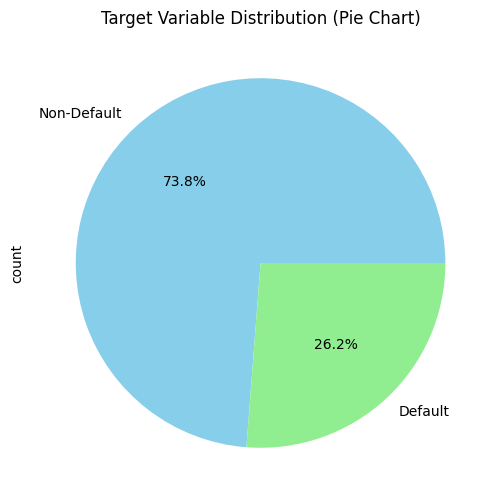

In [67]:
# Plot pie chart for class distribution
plt.figure(figsize=(6, 6))
data_train['TARGET_LABEL_BAD.1'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Default', 'Default'], colors=['skyblue', 'lightgreen'])
plt.title('Target Variable Distribution (Pie Chart)')
plt.show()

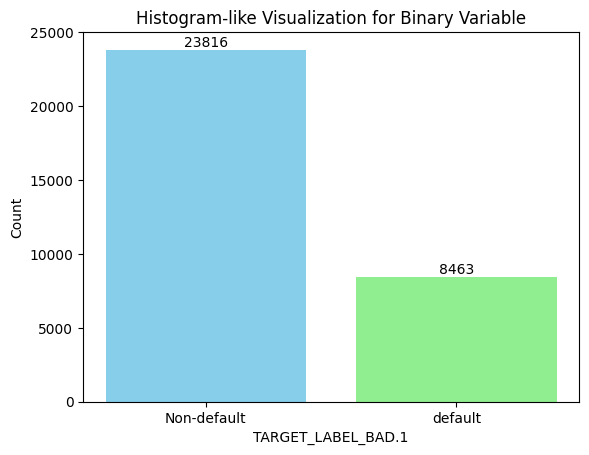

In [68]:
# Count the occurrences of each category (0 or 1)
counts = data_train['TARGET_LABEL_BAD.1'].value_counts()

# Create a bar plot to mimic a histogram
plt.bar(counts.index, counts.values, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('TARGET_LABEL_BAD.1')
plt.ylabel('Count')
plt.title('Histogram-like Visualization for Binary Variable')
plt.xticks(counts.index, labels=['Non-default', 'default'])

for i in range(len(counts)):
    plt.text(counts.index[i], counts.values[i], str(counts.values[i]), ha='center', va='bottom')


# Show the plot
plt.show()

## INDEPENDENT VARIABLE

<Axes: ylabel='count'>

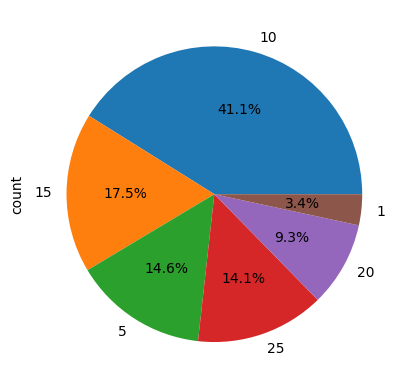

In [69]:
data_train['PAYMENT_DAY'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

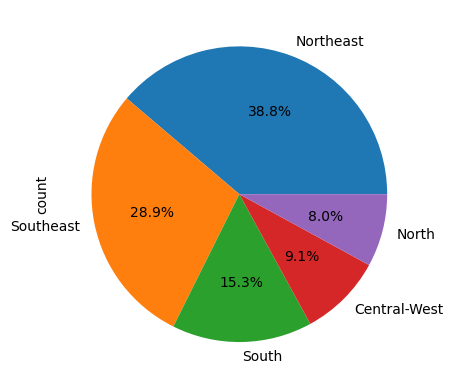

In [70]:
data_train['RESIDENCIAL_REGION'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

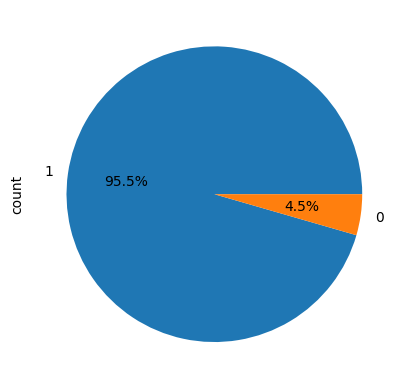

In [71]:
data_train['NATIONALITY'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

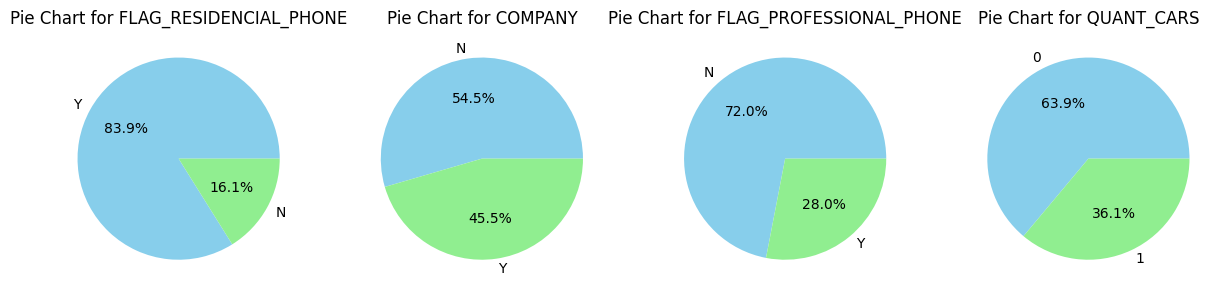

In [72]:
predictors = ['FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE','QUANT_CARS']

# Create subplots for each pie chart
fig, axs = plt.subplots(1, len(predictors), figsize=(15, 5))

# Plot a pie chart for each predictor
for i, predictor in enumerate(predictors):
    counts = data_train[predictor].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    axs[i].set_title(f'Pie Chart for {predictor}')

plt.show()

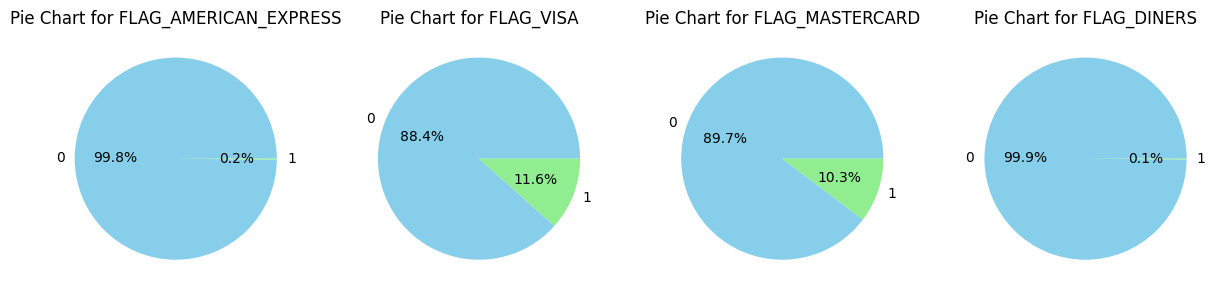

In [73]:
predictors = ['FLAG_AMERICAN_EXPRESS', 'FLAG_VISA', 'FLAG_MASTERCARD','FLAG_DINERS']

# Create subplots for each pie chart
fig, axs = plt.subplots(1, len(predictors), figsize=(15, 5))

# Plot a pie chart for each predictor
for i, predictor in enumerate(predictors):
    counts = data_train[predictor].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    axs[i].set_title(f'Pie Chart for {predictor}')

plt.show()

<Axes: ylabel='count'>

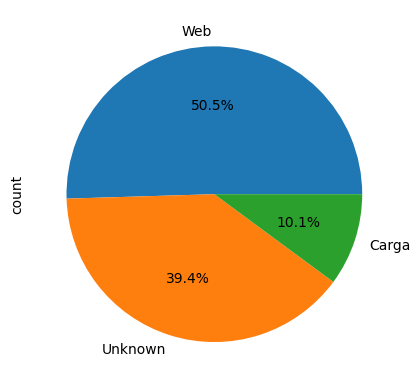

In [74]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

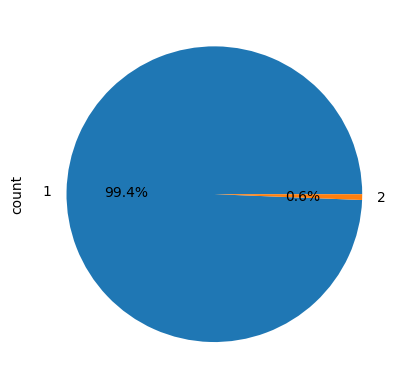

In [75]:
data_train['POSTAL_ADDRESS_TYPE'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

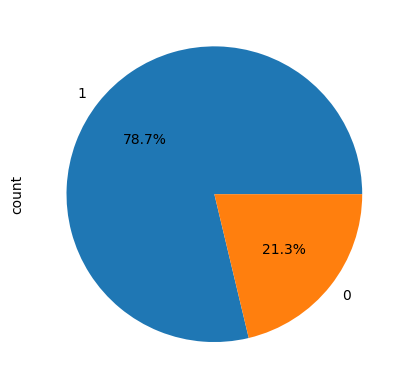

In [76]:
data_train['FLAG_EMAIL'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

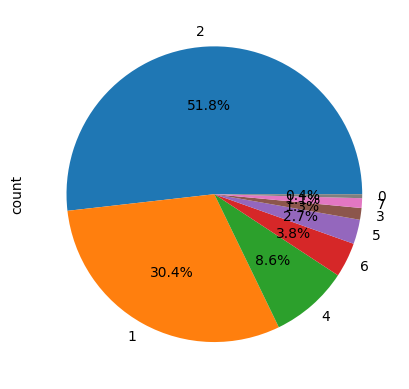

In [77]:
data_train['MARITAL_STATUS'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

# NUMERICAL

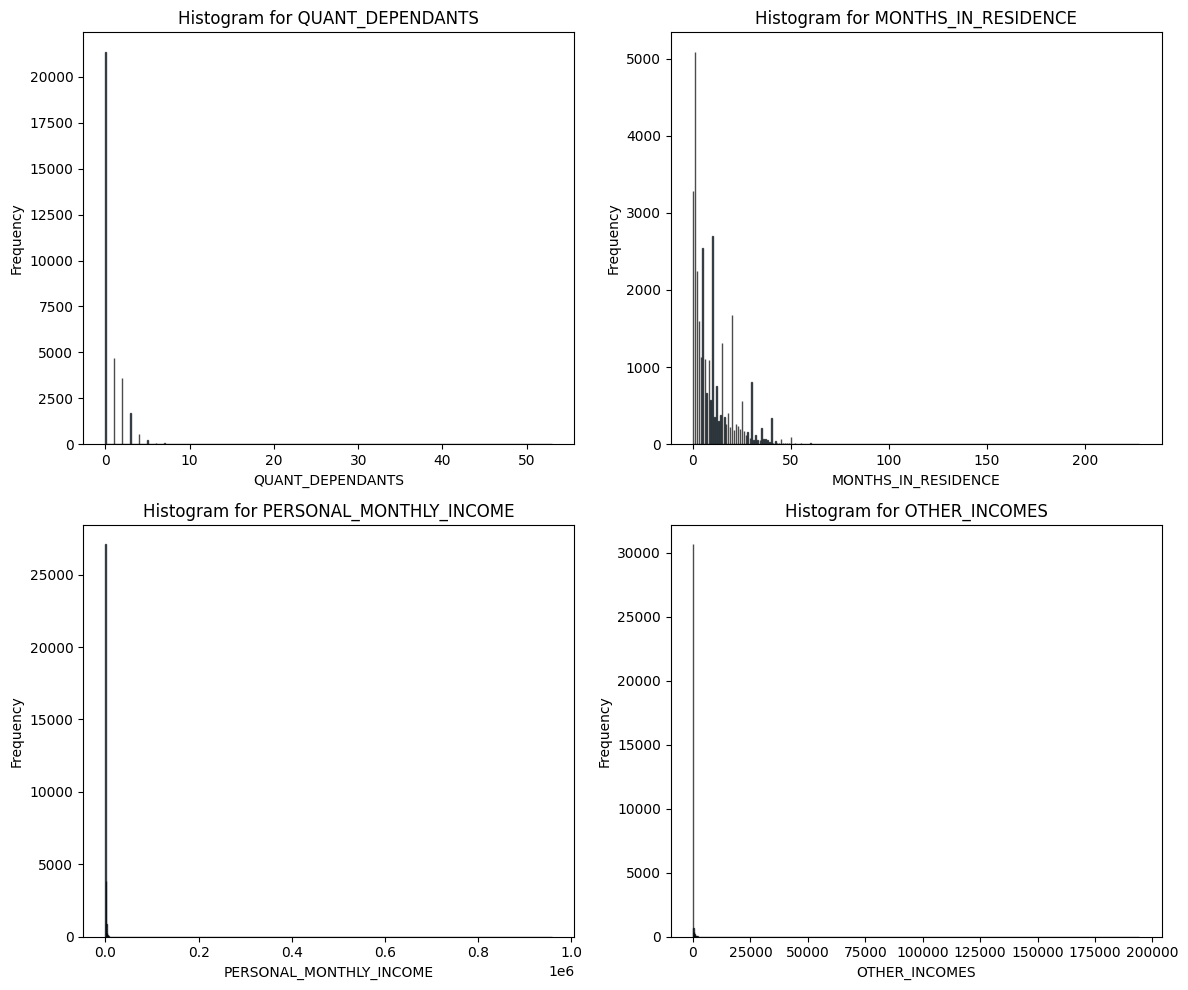

In [78]:
# List of numerical columns
numerical_columns = ['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES']

# Create subplots for each histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot a histogram for each numerical column
for i, column in enumerate(numerical_columns):
    axs[i].hist(data_train[column], bins=1000, edgecolor='black', alpha=0.7)
    axs[i].set_title(f'Histogram for {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# RELATIONSHIP

c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

AttributeError: 'numpy.int64' object has no attribute 'startswith'

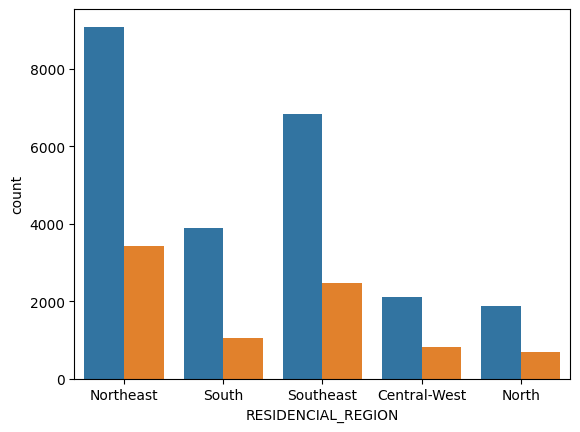

In [79]:
fig8, ax8 = plt.subplots()
sns.countplot(data = data_train, x = data_train['RESIDENCIAL_REGION'], hue = 'TARGET_LABEL_BAD.1',ax = ax8)
plt.title('RESIDENCIAL_REGION VS TARGET_LABEL_BAD.1')
for label in ax8.containers:
    ax8.bar_label(label)

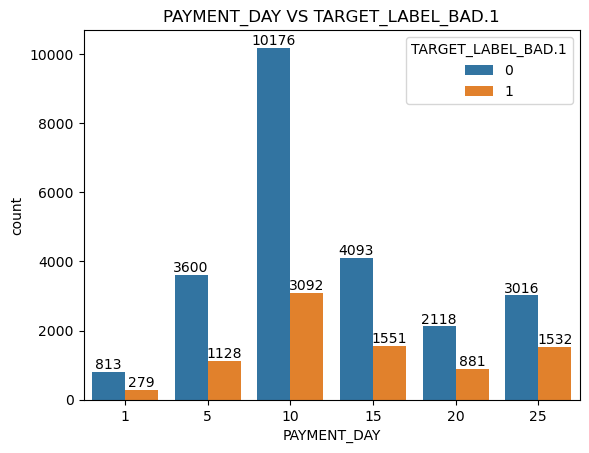

In [ ]:
fig8, ax8 = plt.subplots()
sns.countplot(data = data_train, x = data_train['PAYMENT_DAY'], hue = 'TARGET_LABEL_BAD.1',ax = ax8)
plt.title('PAYMENT_DAY VS TARGET_LABEL_BAD.1')
for label in ax8.containers:
    ax8.bar_label(label)

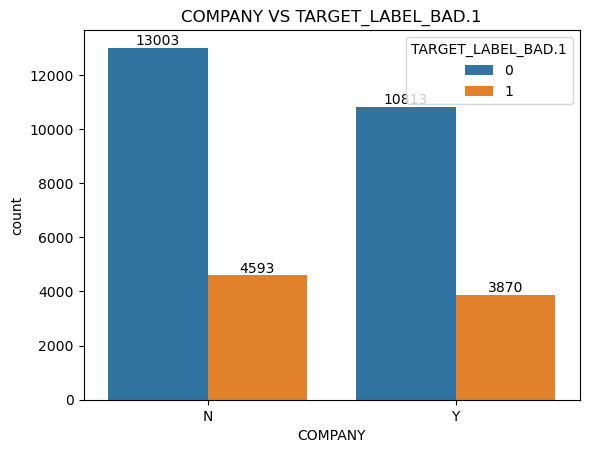

In [ ]:
fig8, ax8 = plt.subplots()
sns.countplot(data = data_train, x = data_train['COMPANY'], hue = 'TARGET_LABEL_BAD.1',ax = ax8)
plt.title('COMPANY VS TARGET_LABEL_BAD.1')
for label in ax8.containers:
    ax8.bar_label(label)

# HEATPLOT

/tmp/ipykernel_158/4118322636.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(),square=True, annot=True,cmap="YlGnBu")


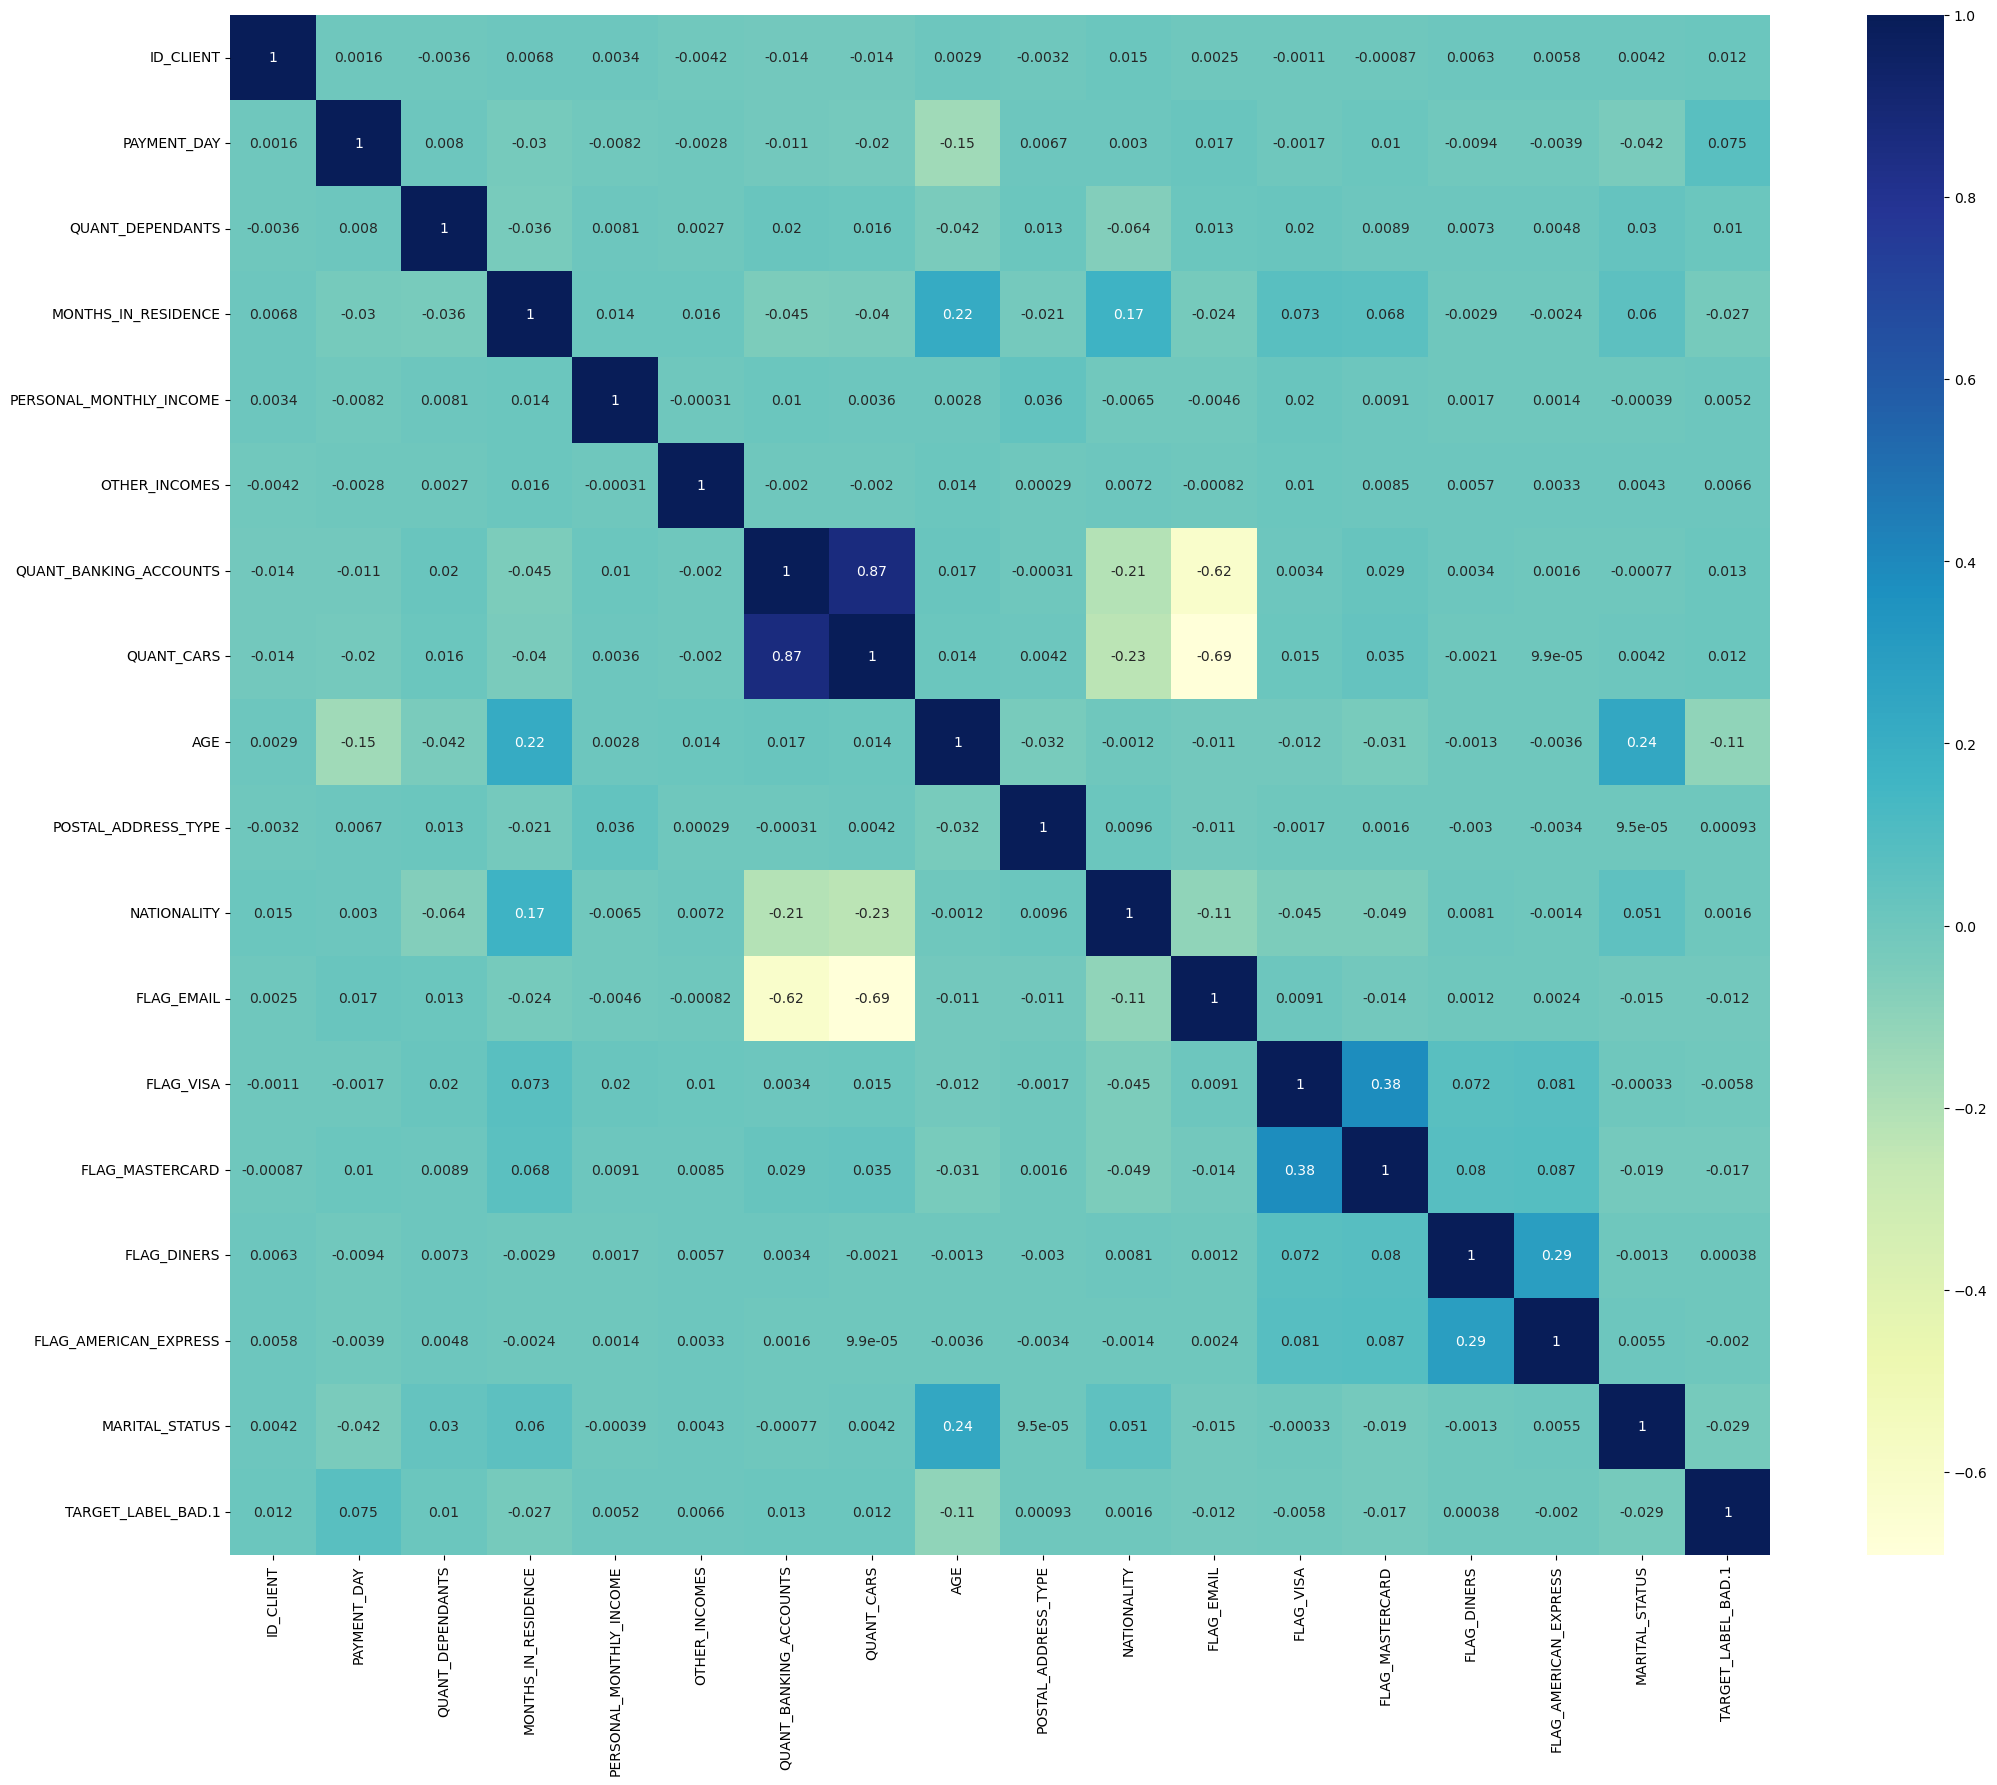

In [ ]:
plt.subplots(figsize=(25,20))
sns.heatmap(data_train.corr(),square=True, annot=True,cmap="YlGnBu")
plt.show()

# QUANT_CARS HAVE HIGH CORRELATION WITH BANKING ACCOUNT AND FLAG EMAIL - MAY DROP TWO

In [86]:
data_train['QUANT_CARS'].value_counts()

QUANT_CARS
0    20628
1    11651
Name: count, dtype: int64

In [87]:
data_train['QUANT_BANKING_ACCOUNTS'].value_counts()

QUANT_BANKING_ACCOUNTS
0    20084
1    12185
2       10
Name: count, dtype: int64

In [88]:
data_train.drop('QUANT_BANKING_ACCOUNTS', axis=1, inplace=True)

In [89]:
data_test.drop('QUANT_BANKING_ACCOUNTS', axis=1, inplace=True)

In [90]:
data_train.drop('FLAG_EMAIL', axis=1, inplace=True)

In [91]:
data_test.drop('FLAG_EMAIL', axis=1, inplace=True)

In [92]:
num_data = data_train[['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES','AGE']]

In [93]:
num_data.head()

,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE
1,0,22.0,972.0,0.0,61
2,0,0.0,482.0,0.0,64
3,0,31.0,912.0,0.0,68
4,0,30.0,454.0,0.0,39
5,1,14.0,462.0,0.0,47


c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

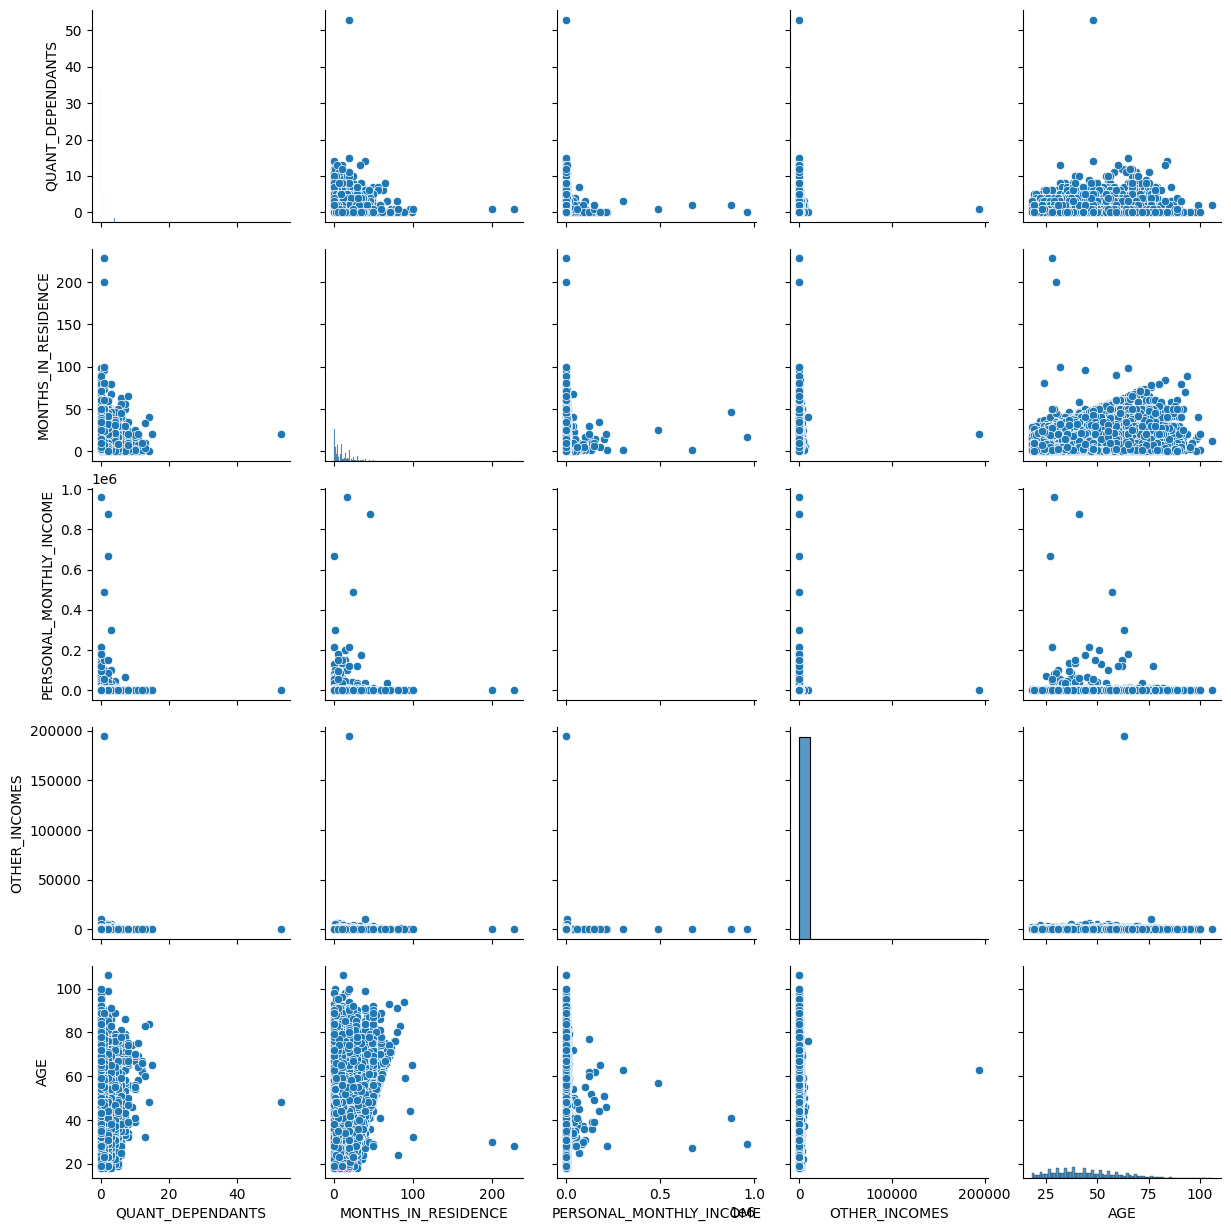

In [94]:
sns.pairplot(num_data)
plt.show()

# OUTLIER

# TRAIN TEST SPLIT

In [99]:
y_train = data_train["TARGET_LABEL_BAD.1"]
x_train = data_train.drop(columns=["TARGET_LABEL_BAD.1"])
y_test = data_test["TARGET_LABEL_BAD.1"]
x_test = data_test.drop(columns=["TARGET_LABEL_BAD.1"])


x_train.shape
x_train.columns

Index(['ID_CLIENT', 'PAYMENT_DAY', 'QUANT_DEPENDANTS',
       'FLAG_RESIDENCIAL_PHONE', 'MONTHS_IN_RESIDENCE',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_CARS', 'COMPANY',
       'FLAG_PROFESSIONAL_PHONE', 'AGE', 'APPLICATION_SUBMISSION_TYPE',
       'POSTAL_ADDRESS_TYPE', 'NATIONALITY', 'FLAG_VISA', 'FLAG_MASTERCARD',
       'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'MARITAL_STATUS',
       'RESIDENCIAL_REGION'],
      dtype='object')

# SCALLING - NAN

In [96]:
# Extract the numerical predictor columns (replace with your column names)
numerical_predictor_columns = ['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES','AGE']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical predictors
data[numerical_predictor_columns] = scaler.fit_transform(data[numerical_predictor_columns])
